In [1]:
#Data Generation & Preparation
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid") 
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# 1. Synthetic Data Generation 
n = 1000
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2024-12-31')
dates = pd.to_datetime(np.random.choice(pd.date_range(start_date, end_date, freq='D'), n))

In [4]:
# Define categories based on the case study insights

product_categories = ['Machinery', 'Tools', 'Electrical', 'Automotive', 'Other'] 
regions = ['North', 'South', 'East', 'West']
customer_types = ['Corporate', 'Distributor', 'Retail'] 
sales_channels = ['Online', 'Offline']

In [5]:
# Adjusting category distribution to match the insight and show that Machinery and Electrical dominate
category_choices = np.random.choice( product_categories, n, p=[0.35, 0.15, 0.25, 0.15, 0.10])

In [6]:
# Adjusting region distribution to match the insight: South and West contribute most orders
region_choices = np.random.choice( regions, n, p=[0.20, 0.35, 0.10, 0.35])

In [7]:
data = { 
    'Order_ID': np.arange(1001, 1001 + n),
    'Date': dates, 
    'Product_Category': category_choices, 
    'Product_Name': np.random.choice(['Pump', 'Compressor', 'Welding Machine', 'Conveyor Belt', 'Drill', 'Motor', 'Valve', 'Gearbox', 'Cable', 'Switch'], n), 
    'Region': region_choices, 
    'Customer_Type': np.random.choice(customer_types, n), 
    'Units_Sold': np.random.randint(10, 200, n), 
    'Unit_Price': np.random.randint(500, 5000, n), 
    'Discount': np.random.uniform(0, 0.25, n), 
    'Sales_Channel': np.random.choice(sales_channels, n, p=[0.45, 0.55]) 
}

In [8]:
df = pd.DataFrame(data)

In [9]:
# Calculate Total_Sales and Profit based on the formula and insights
df['Total_Sales'] = df['Units_Sold'] * df['Unit_Price'] * (1 - df['Discount'])

In [10]:
# Calculate a base margin ,assuming 20 percent
base_margin = df['Total_Sales'] * 0.20

In [11]:
## adjusting machiney as in the insight its given to dominate and yield highest profit
df.loc[df['Product_Category'] == 'Machinery', 'Profit_Multiplier'] = 1.8

In [12]:
#adjusting to Corporate clients have higher average profits as per insights
df.loc[df['Customer_Type'] == 'Corporate', 'Profit_Multiplier'] = 1.5

In [13]:
df['Profit_Adjustment'] = 1 - (df['Discount'] * 2) 

In [14]:
df['Profit'] = base_margin * df['Profit_Multiplier'].fillna(1.0) * df['Profit_Adjustment']
# Final Profit calculation (Base Margin * Category/Customer Multiplier * Discount Adjustment)

In [15]:
df.head()

,Order_ID,Date,Product_Category,Product_Name,Region,Customer_Type,Units_Sold,Unit_Price,Discount,Sales_Channel,Total_Sales,Profit_Multiplier,Profit_Adjustment,Profit
0,1001,2024-10-13,Electrical,Valve,South,Distributor,198,3016,0.072882,Offline,553645.208380,NaN,0.854236,94588.736076
1,1002,2024-05-01,Electrical,Welding Machine,South,Distributor,161,2119,0.237863,Online,260009.888718,NaN,0.524274,27263.282421
2,1003,2023-10-26,Tools,Pump,South,Retail,14,2658,0.158888,Online,31299.476142,NaN,0.682225,4270.656280
3,1004,2024-03-17,Other,Motor,North,Corporate,12,1775,0.053505,Offline,20160.347464,1.5,0.892990,5400.898855
4,1005,2023-12-21,Machinery,Compressor,East,Retail,173,1164,0.053956,Online,190506.695749,1.8,0.892087,61181.493202


 2. Exploratory Data Analysis (EDA)
2.1 Univariate Analysis (Single Variable Insights)


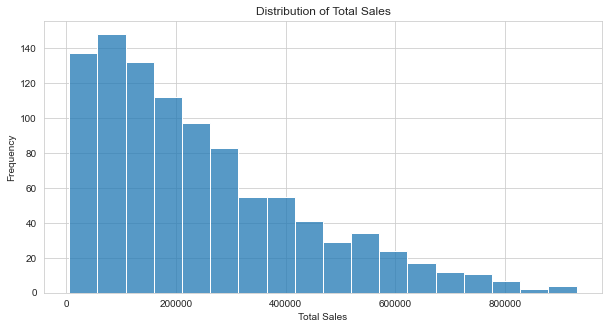

In [16]:
# Total_Sales Histogram (Insight: Sales values are right-skewed)
plt.figure(figsize=(10, 5)) 
sns.histplot(df['Total_Sales'])
plt.title('Distribution of Total Sales') 
plt.xlabel('Total Sales') 
plt.ylabel('Frequency')
plt.show()

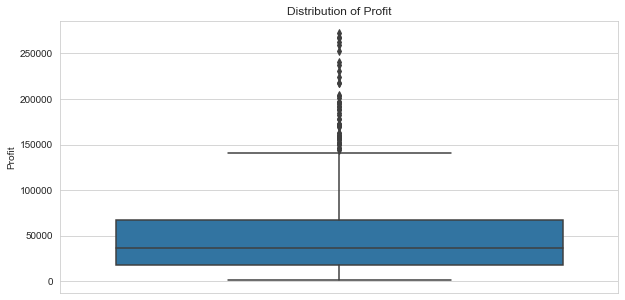

In [17]:
# Profit Boxplot (Insight: Some high-profit outliers)
plt.figure(figsize=(10, 5)) 
sns.boxplot(y=df['Profit']) 
plt.title('Distribution of Profit')
plt.ylabel('Profit')
plt.show()

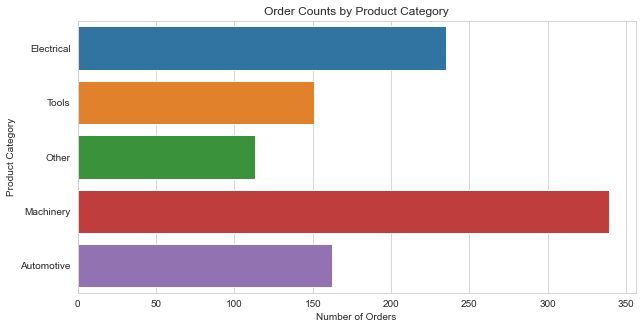

In [18]:
# Product_Category Countplot (Insight: Machinery and Electrical dominate)
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Product_Category']) 
plt.title('Order Counts by Product Category')
plt.xlabel('Number of Orders') 
plt.ylabel('Product Category')
plt.show()

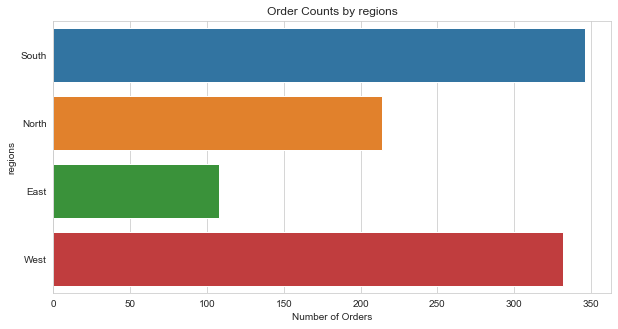

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Region']) 
plt.title('Order Counts by regions')
plt.xlabel('Number of Orders') 
plt.ylabel('regions')
plt.show()

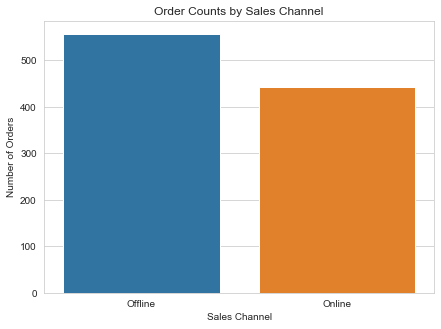

In [20]:
# Sales_Channel Countplot (Insight: Offline sales slightly higher)
plt.figure(figsize=(7, 5)) 
sns.countplot(x=df['Sales_Channel']) 
plt.title('Order Counts by Sales Channel') 
plt.xlabel('Sales Channel') 
plt.ylabel('Number of Orders')
plt.show()


2.2 Bivariate Analysis (Relationships) 

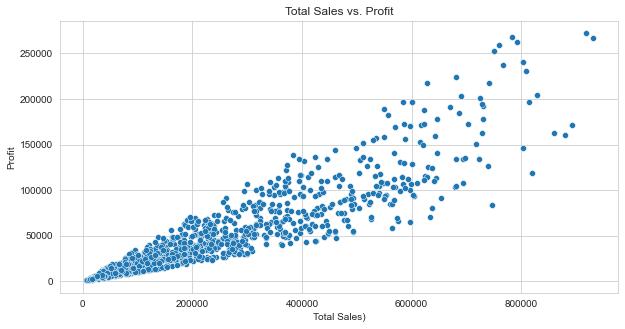

In [21]:
# Total_Sales vs Profit Scatterplot (Insight: Positive correlation) 
plt.figure(figsize=(10, 5)) 
sns.scatterplot(x='Total_Sales', y='Profit', data=df)
plt.title('Total Sales vs. Profit') 
plt.xlabel('Total Sales)') 
plt.ylabel('Profit') 
plt.show()

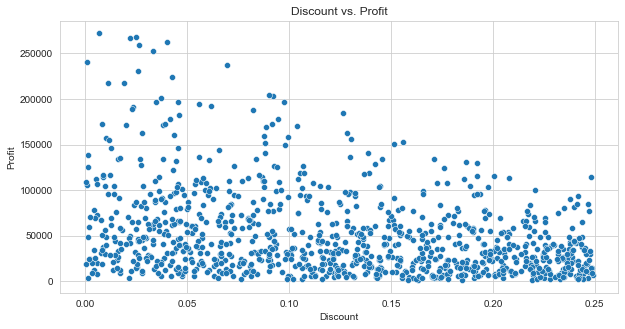

In [22]:
#Discount vs Profit Scatterplot (Insight: Negative relationship)
plt.figure(figsize=(10, 5)) 
sns.scatterplot(x='Discount', y='Profit', data=df) 
plt.title('Discount vs. Profit') 
plt.xlabel('Discount')
plt.ylabel('Profit') 
plt.show()

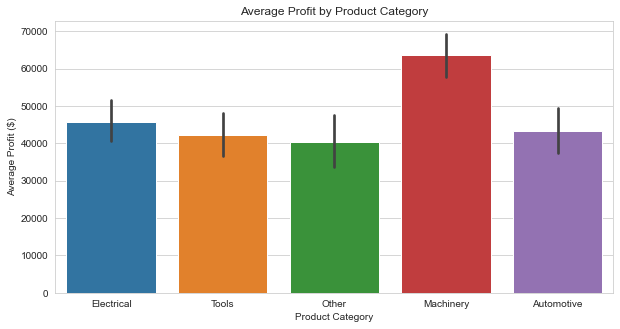

In [23]:
# Product_Category vs Profit Barplot (Insight: Machinery yields highest profit)
plt.figure(figsize=(10, 5)) 
sns.barplot(x='Product_Category', y='Profit', data=df, estimator=np.mean) 
plt.title('Average Profit by Product Category')
plt.xlabel('Product Category') 
plt.ylabel('Average Profit ($)') 
plt.show()

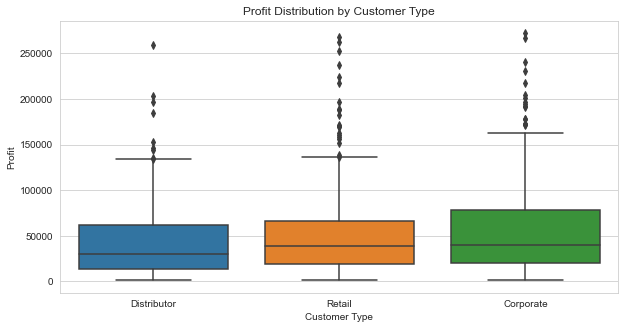

In [24]:
# Customer_Type vs Profit Boxplot (Insight: Corporate clients have higher average profits)
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='Customer_Type', y='Profit', data=df) 
plt.title('Profit Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Profit') 
plt.show()

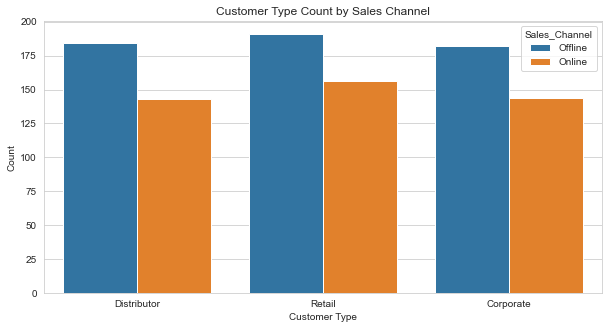

In [25]:
# Sales_Channel vs Customer_Type Countplot (Insight: Retail customers prefer Online, Distributors prefer Offline)
plt.figure(figsize=(10, 5))
sns.countplot(x='Customer_Type', hue='Sales_Channel', data=df)
plt.title('Customer Type Count by Sales Channel')
plt.xlabel('Customer Type') 
plt.ylabel('Count') 
plt.show()

2.3 Correlation Matrix 

In [26]:
numerical_df = df[['Units_Sold', 'Unit_Price', 'Discount', 'Total_Sales', 'Profit']]
correlation_matrix = numerical_df.corr()

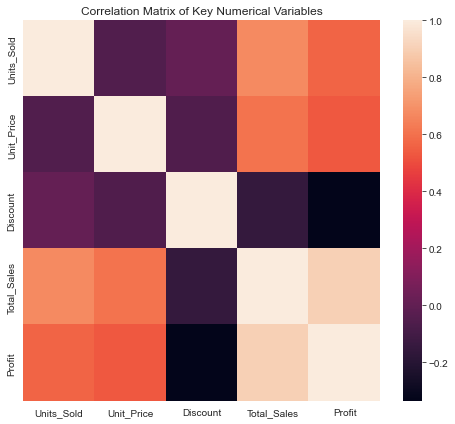

In [27]:
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix) 
plt.title('Correlation Matrix of Key Numerical Variables') 
plt.show()

In [28]:
print("\nKey Correlations Observed (Matching Case Study Insights):")
print(f"Total_Sales vs Profit: {correlation_matrix.loc['Total_Sales', 'Profit']:.2f} (Strong positive)")
print(f"Discount vs Profit: {correlation_matrix.loc['Discount', 'Profit']:.2f} (Moderate negative)") 
print(f"Units_Sold vs Total_Sales: {correlation_matrix.loc['Units_Sold', 'Total_Sales']:.2f} (Strong positive)") 
print(f"Unit_Price vs Profit: {correlation_matrix.loc['Unit_Price', 'Profit']:.2f} (Moderate positive)")


Key Correlations Observed (Matching Case Study Insights):
Total_Sales vs Profit: 0.90 (Strong positive)
Discount vs Profit: -0.34 (Moderate negative)
Units_Sold vs Total_Sales: 0.68 (Strong positive)
Unit_Price vs Profit: 0.53 (Moderate positive)


 3.Trend Analysis 

In [29]:
df['Year'] = df['Date'].dt.year 
df['Month'] = df['Date'].dt.to_period('M')

In [30]:
monthly_sales = df.groupby('Month')['Total_Sales'].sum().to_frame() 
monthly_sales.index = monthly_sales.index.astype(str)

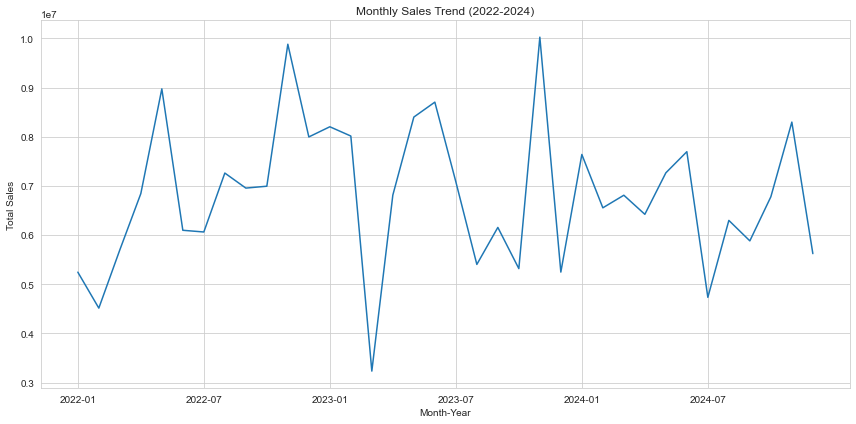

In [31]:
# Monthly & Yearly Trends Plot (Insight: Steady growth, Q2 peaks)
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y='Total_Sales', data=monthly_sales) 
plt.title('Monthly Sales Trend (2022-2024)')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales') 
plt.xticks(monthly_sales.index[::6]) # Show every 6th month label
plt.tight_layout()
plt.show()

In [32]:
# Annual Sales Trend 
annual_sales = df.groupby('Year')['Total_Sales'].sum() 
print("\nAnnual Total Sales:") 
print(annual_sales)


Annual Total Sales:
Year
2022    8.253487e+07
2023    8.261089e+07
2024    8.000959e+07
Name: Total_Sales, dtype: float64


In [33]:
# Category Performance Trend 
category_sales = df.groupby('Product_Category')['Total_Sales'].sum() 
print("\nCategory Total Sales Contribution:")
print(category_sales) 
print(f"Machinery Total Sales Contribution: {category_sales.loc['Machinery'] / category_sales.sum():.2%}")


Category Total Sales Contribution:
Product_Category
Automotive    3.939795e+07
Electrical    5.976481e+07
Machinery     8.328166e+07
Other         2.531113e+07
Tools         3.739978e+07
Name: Total_Sales, dtype: float64
Machinery Total Sales Contribution: 33.97%
